
Begin whale optimization algorithm on rastrigin function

Goal is to minimize Rastrigin's function in 5 variables
Function has known min = 0.0 at (0, 0, 0, 0, 0)
Setting num_whales = 30
Setting max_iter = 100

Starting WOA algorithm

Iter = 2 best fitness = 0.242
Iter = 3 best fitness = 0.259
Iter = 4 best fitness = 0.273
Iter = 5 best fitness = 0.273
Iter = 6 best fitness = 0.318
Iter = 7 best fitness = 0.318
Iter = 8 best fitness = 0.318
Iter = 9 best fitness = 0.323
Iter = 10 best fitness = 0.327
Iter = 11 best fitness = 0.341
Iter = 12 best fitness = 0.361
Iter = 13 best fitness = 0.383
Iter = 14 best fitness = 0.461
Iter = 15 best fitness = 0.479
Iter = 16 best fitness = 0.479
Iter = 17 best fitness = 0.479
Iter = 18 best fitness = 0.479
Iter = 19 best fitness = 0.479
Iter = 20 best fitness = 0.479
Iter = 21 best fitness = 0.479
Iter = 22 best fitness = 0.479
Iter = 23 best fitness = 0.479
Iter = 24 best fitness = 0.479
Iter = 25 best fitness = 0.495
Iter = 26 best fitness = 0.58

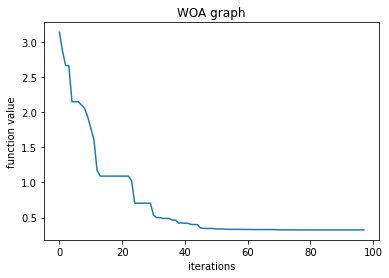

In [39]:
# python implementation of whale optimization algorithm (WOA)
# minimizing rastrigin and sphere function


import random
import math # cos() for Rastrigin
import copy # array-copying convenience
import sys # max float
import matplotlib.pyplot as plt



# -------fitness functions---------

# rastrigin function
def obj(position):
	fitness_value = 0.0
	for i in range(len(position)):
		xi = position[i]
		fitness_value += (xi * xi) - (10 * math.cos(2 * math.pi * xi)) + 10
	return 1.0/(1+fitness_value)

def fitness_rastrigin(data): 
    s1 = 0.
    s2 = 1.
    for k, x in enumerate(data):
        s1 = s1 + x ** 2
        s2 = s2 * math.cos(x/math.sqrt(k+1))
    y = (1./4000.) * s1-s2 + 1
    return 1./(1+y)

# sphere function
def fitness_sphere(position):
	fitness_value = 0.0
	for i in range(len(position)):
		xi = position[i]
		fitness_value += (xi * xi);
	return fitness_value;


# -------------------------


# whale class
class whale:
	def __init__(self, fitness, dim, minx, maxx, seed):
		self.rnd = random.Random(seed)
		self.position = [0.0 for i in range(dim)]

		for i in range(dim):
			self.position[i] = ((maxx - minx) * self.rnd.random() + minx)

		self.fitness = fitness(self.position) # curr fitness


# whale optimization algorithm(WOA)
def woa(fitness, max_iter, n, dim, minx, maxx):
	rnd = random.Random(0)
	print(rnd)

	# create n random whales
	whalePopulation = [whale(fitness, dim, minx, maxx, i) for i in range(n)]

	# compute the value of best_position and best_fitness in the whale Population
	Xbest = copy.copy(whalePopulation[0].position)
	Fbest = whalePopulation[0].fitness
	Xb=[]
	Fb=[]

	for i in range(1,n): # check each whale
		if whalePopulation[i].fitness > Fbest:
			Fbest = whalePopulation[i].fitness
			Xbest = copy.copy(whalePopulation[i].position)

	# main loop of woa
	Iter = 0
	while Iter < max_iter:

		# after every 10 iterations
		# print iteration number and best fitness value so far
		if Iter % 1 == 0 and Iter > 1:
			print("Iter = " + str(Iter) + " best fitness = %.3f" % Fbest)
			Xb.append(Iter)
			Fb.append(Fbest)

		# linearly decreased from 2 to 0
		a = 2 * (1 - Iter / max_iter)
		a2=-1+Iter*((-1)/max_iter)

		for i in range(n):
			A = 2 * a * rnd.random() - a
			C = 2 * rnd.random()
			b = 1
			l = (a2-1)*rnd.random()+1;
			p = rnd.random()

			D = [0.0 for i in range(dim)]
			D1 = [0.0 for i in range(dim)]
			Xnew = [0.0 for i in range(dim)]
			Xrand = [0.0 for i in range(dim)]
			if p < 0.5:
				if abs(A) > 1:
					for j in range(dim):
						D[j] = abs(C * Xbest[j] - whalePopulation[i].position[j])
						Xnew[j] = Xbest[j] - A * D[j]
				else:
					p = random.randint(0, n - 1)
					while (p == i):
						p = random.randint(0, n - 1)

					Xrand = whalePopulation[p].position

					for j in range(dim):
						D[j] = abs(C * Xrand[j] - whalePopulation[i].position[j])
						Xnew[j] = Xrand[j] - A * D[j]
			else:
				for j in range(dim):
					D1[j] = abs(Xbest[j] - whalePopulation[i].position[j])
					Xnew[j] = D1[j] * math.exp(b * l) * math.cos(2 * math.pi * l) + Xbest[j]

			for j in range(dim):
				whalePopulation[i].position[j] = Xnew[j]

		for i in range(n):
			# if Xnew < minx OR Xnew > maxx
			# then clip it
			for j in range(dim):
				whalePopulation[i].position[j] = min(whalePopulation[i].position[j], maxx)
				whalePopulation[i].position[j] = max(whalePopulation[i].position[j], minx)

			whalePopulation[i].fitness = fitness(whalePopulation[i].position)

			if (whalePopulation[i].fitness > Fbest):
				Xbest = copy.copy(whalePopulation[i].position)
				Fbest = whalePopulation[i].fitness


		Iter += 1
	# end-while

	# returning the best solution
	return Xbest,Xb,Fb


# ----------------------------


# Driver code for rastrigin function

print("\nBegin whale optimization algorithm on rastrigin function\n")
dim = 5
fitness = fitness_rastrigin

print("Goal is to minimize Rastrigin's function in " + str(dim) + " variables")
print("Function has known min = 0.0 at (", end="")
for i in range(dim - 1):
	print("0, ", end="")
print("0)")

num_whales = 30
max_iter = 100

print("Setting num_whales = " + str(num_whales))
print("Setting max_iter = " + str(max_iter))
print("\nStarting WOA algorithm\n")

best_position,x,y = woa(fitness, max_iter, num_whales, dim, -600, 600)

print("\nWOA completed\n")
print("\nBest solution found:")
print(["%.6f" % best_position[k] for k in range(dim)])
err = fitness(best_position)
print("fitness of best solution = %.6f" % err)

print("\nEnd WOA for rastrigin\n")

plt.plot([(1-d)/d for d in y])
plt.xlabel("iterations")
plt.ylabel("function value")
plt.title("WOA graph")
plt.show()


# # Driver code for Sphere function
# print("\nBegin whale optimization algorithm on sphere function\n")
# dim = 3
# fitness = fitness_sphere

# print("Goal is to minimize sphere function in " + str(dim) + " variables")
# print("Function has known min = 0.0 at (", end="")
# for i in range(dim - 1):
# 	print("0, ", end="")
# print("0)")

# num_whales = 50
# max_iter = 100

# print("Setting num_whales = " + str(num_whales))
# print("Setting max_iter = " + str(max_iter))
# print("\nStarting WOA algorithm\n")

# best_position,x,y = woa(fitness, max_iter, num_whales, dim, -10.0, 10.0)

# print("\nWOA completed\n")
# print("\nBest solution found:")
# print(["%.6f" % best_position[k] for k in range(dim)])
# err = fitness(best_position)
# print("fitness of best solution = %.6f" % err)

# print("\nEnd WOA for sphere\n")
